In [6]:
import sys
import os
from pathlib import Path
# Get the absolute path to the repository root
repo_root = Path.cwd().parent.absolute()  # Assuming notebook is in tests dir
# Add the repository root to the Python path
sys.path.insert(0, str(repo_root))

# Now try importing
import dambuhala.dambuhala as dam

1. Wang et al (2018) empirical equation for peak discharge [commit c7570c2](https://github.com/ricsatjr/dambuhala/commit/c7570c26ffab528153ffdcb5a6724f0f442cec20)
2. Generation of hydrograph from empirical equation and beta distribution [commit c7570c2](https://github.com/ricsatjr/dambuhala/commit/c7570c26ffab528153ffdcb5a6724f0f442cec20)

TOTAL WATER VOLUME (m^3): 35706600.0
PEAK DISCHARGE (m^3/s): 2276.5465621175376
(a,b)		duration	(sum of volume slices)
(1.64, 3.99) 	 9.75 		 9918.041893982365
(4.5, 4.82) 	 10.34 		 9918.844261400656
(1.97, 5.81) 	 12.03 		 9918.42507758188
(4.41, 8.68) 	 13.3 		 9920.252166816992
(2.33, 9.56) 	 16.57 		 9921.22063189829


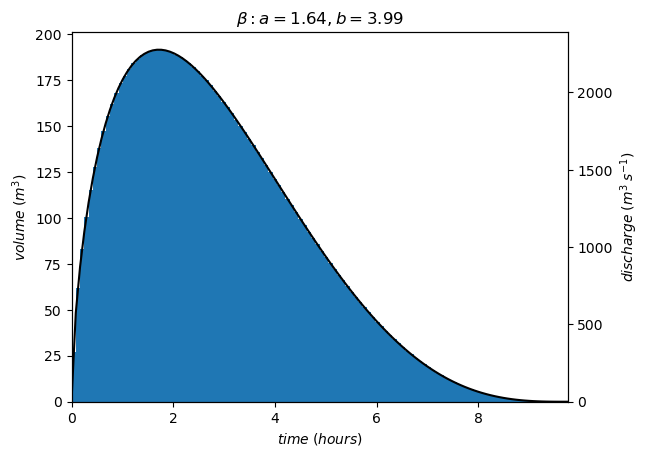

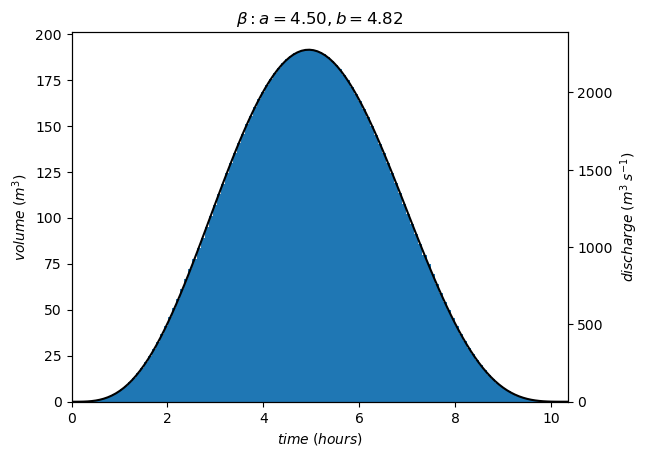

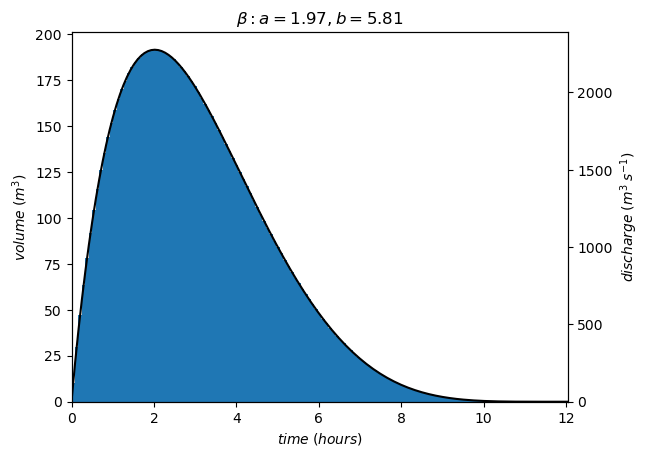

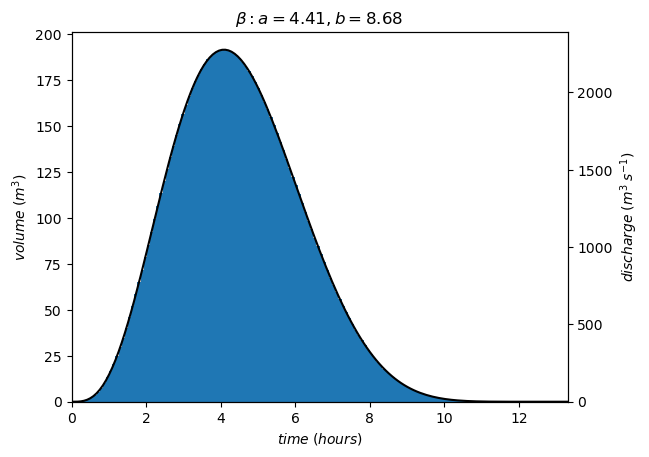

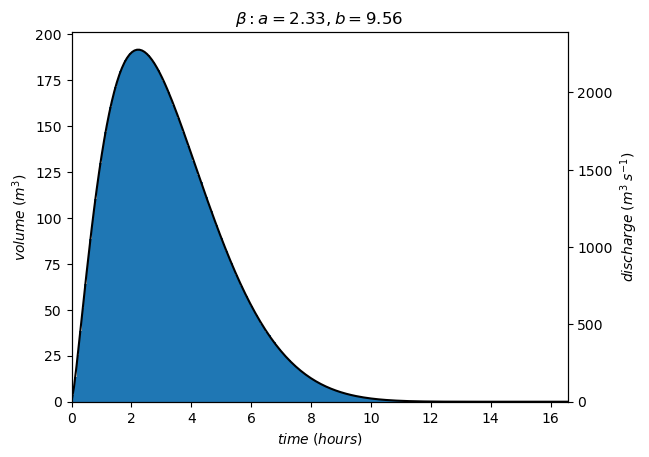

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Use Wang et al (2018) empirical equation to compute peak discharge from volume and heigh of water above breach
Vw=35706600.0
Hw=50
Qp=dam.wang_etal_2018_eq4(Vw,Hw)



#initialize hydrograph
dt=1/12   # set target time step for hydrograph, in hours
minpeakloc=0.1
maxpeakloc=0.5
hg=dam.hydrograph_BetaDist(Vw,Qp,dt,minpeakloc=minpeakloc,maxpeakloc=maxpeakloc)
plt.close("all")
v=0
print(f'TOTAL WATER VOLUME (m^3): {hg.Vw}')
print(f'PEAK DISCHARGE (m^3/s): {hg.Qp}')
print(f'(a,b)\t\tduration\t(sum of volume slices)')
    
for p in hg.valid_beta_params[:min(5,len(hg.valid_beta_params))]:
    t,q,v=hg.make_hydrograph(p[0],p[1],plot=True)
    print((float(p[0]),float(p[1])),"\t",np.round(hg.T,2),"\t\t",np.sum(hg.v))
  